In [46]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
import torch.nn as nn
from torch.utils import data
import sys
sys.path.append("..")

In [68]:
num_train,num_test=7000,3000
num_inputs=500
num_outputs=1
batch_size,num_epochs,lr=1,30,0.0001
true_w, true_b = torch.ones(num_inputs,1)*0.0056,0.0028

In [48]:
features = torch.randn(num_train+num_test,num_inputs)
labels = torch.matmul(features,true_w)+true_b
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)

In [49]:
train_features,test_features = features[:num_train,:],features[num_train:,:]
train_labels,test_labels=labels[:num_train],labels[num_train:]

In [50]:
train_dataset=torch.utils.data.TensorDataset(train_features,train_labels)
train_iter=torch.utils.data.DataLoader(train_dataset,batch_size,shuffle=True,num_workers=2)
test_dataset=torch.utils.data.TensorDataset(test_features,test_labels)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True, num_workers=2)

In [63]:
def squared_loss(y_hat,y):
    return ((y_hat-y.view(y_hat.size()))**2)/2
loss = squared_loss

In [64]:
def Draw_Loss_Curve(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,legend=None,figsize=(3.5,2.5)):
    display.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize']=figsize
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals,y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals,y2_vals,linestyle=':')
        plt.legend(legend)

In [65]:
def fit_and_plot_pytorch():
    net=nn.Linear(num_inputs,1)
    nn.init.normal_(net.weight,mean=0,std=1)
    nn.init.normal_(net.bias,mean=0,std=1)
    optimizer=torch.optim.SGD(net.parameters(),lr)
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l=loss(net(X),y).sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(loss(net(train_features),train_labels).mean().item())
        test_ls.append(loss(net(test_features),test_labels).mean().item())
    Draw_Loss_Curve(range(1,num_epochs+1),train_ls,'epochs','loss',range(1,num_epochs+1),test_ls,['train','test'])

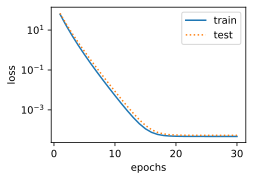

In [69]:
fit_and_plot_pytorch()